<a href="https://colab.research.google.com/github/jpdicarvalho/Extras/blob/main/AlgoritmoAntColony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

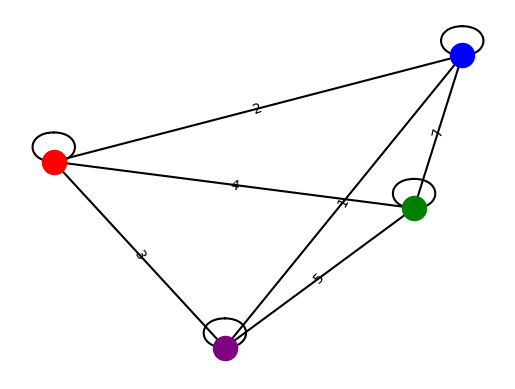

Melhor caminho encontrado: [0, 1, 3]
Custo do melhor caminho: 3


In [ ]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
#graph:  matriz de adjacência representando o grafo ponderado(arestas possuem um peso)
#source: índice do nó de origem
#destino: índice do nó de destino
#num_formigas:  número de formigas usadas para construir caminhos
# alpha: parâmetro que controla a importância da trilha de feromônio em relação ao peso da aresta ao escolher o próximo nó
#beta: o parâmetro que controla a importância do peso da aresta em relação à trilha de feromônio ao escolher o próximo nó
#evaporation_rate: a taxa de evaporação das trilhas de feromônio existentes após cada iteração
#max_iter: o número máximo de iterações do algoritmo.

def ant_colony_search(graph, origem, destino, num_formigas, alpha, beta, evaporation_rate, max_iter):
    num_nodes = len(graph)
    pheromone = np.ones((num_nodes, num_nodes))
    pheromone *= 0.1
    
    best_path = []
    best_cost = np.inf
    
    for i in range(max_iter):
      #Criando uma lista vazia para armazenar os caminhos percorridos por cada formiga na iteração atual
        ant_paths = []
      #Criando uma lista vazia para armazenar o custo do caminho percorrido por cada formiga
        ant_costs = []
      #Executando loop para cada formiga
        for ant in range(num_formigas):
            path = []
            path_cost = 0
            
            curr_node = origem
            unvisited_nodes = set(range(num_nodes))
            unvisited_nodes.remove(curr_node)
            
            while curr_node != destino:
                # calcular probabilidades de transição
                prob = np.zeros(num_nodes)
                for j in unvisited_nodes:
                    prob[j] = pheromone[curr_node][j] ** alpha * \
                               (1.0 / graph[curr_node][j]) ** beta
                prob /= prob.sum()
                
                # escolher um próximo nó
                next_node = np.random.choice(range(num_nodes), p=prob)
                
                # adicionar ao caminho percorrido
                path.append(curr_node)
                path_cost += graph[curr_node][next_node]
                
                # atualizar estado do nó atual e conjunto de nós não visitados
                curr_node = next_node
                unvisited_nodes.remove(curr_node)
            
            # adicionar o último nó (destino) ao caminho percorrido
            path.append(destino)
            path_cost += graph[curr_node][destino]
            
            # atualizar o melhor caminho encontrado
            if path_cost < best_cost:
                best_path = path
                best_cost = path_cost
                
            # adicionar o caminho percorrido pela formiga atual ao conjunto de caminhos
            ant_paths.append(path)
            ant_costs.append(path_cost)
        
        # atualizar os valores de feromônio
        pheromone *= (1 - evaporation_rate)
        for path, cost in zip(ant_paths, ant_costs):
            for i in range(len(path) - 1):
                curr_node = path[i]
                next_node = path[i + 1]
                pheromone[curr_node][next_node] += 1.0 / cost        
    return best_path, best_cost
    """
    O valor de feromônio é atualizado após todas as formigas percorrerem o grafo na iteração atual.
    Cada formiga deposita feromônio no caminho percorrido de acordo com o custo do caminho.
    A taxa de evaporação é aplicada a todas as trilhas de feromônio existentes.
    """


# Definindo um grafo simples com 4 vértices
graph = np.array([[0, 2, 4, 3],
                  [2, 0, 7, 1],
                  [4, 7, 0, 5],
                  [3, 1, 5, 0]])

# Chamando o algoritmo de busca com parâmetros iniciais
best_path, best_cost = ant_colony_search(graph, 0, 3, num_formigas=10, alpha=1, beta=2, evaporation_rate=0.5, max_iter=100)

G = nx.Graph()
for i in range(len(graph)):
    for j in range(len(graph)):
        G.add_edge(i, j, weight=graph[i][j])

pos = nx.spring_layout(G)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

nx.draw_networkx_nodes(G, pos, node_color='red', nodelist=[0])#nó/vértice 0
nx.draw_networkx_nodes(G, pos, node_color='blue', nodelist=[1])##nó/vértice 1
nx.draw_networkx_nodes(G, pos, node_color='green', nodelist=[2])##nó/vértice 2
nx.draw_networkx_nodes(G, pos, node_color='purple', nodelist=[3])##nó/vértice 3

edge_width = [1.5 if (best_path[i], best_path[i+1]) in G.edges() or (best_path[i+1], best_path[i]) in G.edges() else 0.5 for i in range(len(best_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=edge_width)
    
plt.axis('off')
plt.show()

print("Melhor caminho encontrado:", best_path)
print("Custo do melhor caminho:", best_cost)